<a href="https://colab.research.google.com/github/amisha-21/Sentiment-analysis-of-news-Israel-vs-Palestine/blob/main/Israel_Tweet_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Libraries**

In [1]:
!pip install tweet-preprocessor 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import preprocessor as p

In [3]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import plotly

# **2. Loading Datasets**

In [4]:
Israel = pd.read_csv('Israel_Final.csv')

In [5]:
Israel.count() 

date     43953
tweet    43953
dtype: int64

 **Dropping Empty and Duplicate Data**

In [6]:
Israel = Israel.dropna()
Israel = Israel.drop_duplicates()
Israel.count()

date     35481
tweet    35481
dtype: int64

# **3. Preprocessing**

**Data Cleaned to Normal Text and Empty & Duplicate Tweets are removed again**

In [7]:
def preprocess_tweet(row):
    tweet = row['tweet']
    tweet = p.clean(tweet)
    return tweet

In [8]:
Israel['tweet'] = Israel.apply(preprocess_tweet, axis=1)

In [9]:
Israel.tail()

,date,tweet
43525,05-09-2021,Not only one sided pro Palestinian terror inci...
43526,05-09-2021,All Indians support Our Brotherhood israel Isr...
43527,05-08-2021,These goyims are out of reality in their Villa...
43528,05-06-2021,When can this end? Our kids are being murdered...
43529,05-10-2021,ILHAN OMAR SUPPORTS TERROR (RT if you agree)


In [10]:
Israel = Israel.dropna()
Israel = Israel.drop_duplicates()
Israel.count()

date     32882
tweet    32882
dtype: int64

**Normal text preprocessing like**

*   Stopwords removal 
*  Replace extra white spaces
*  Punctuation Removal
*   Lowercasing






In [11]:
pip install --upgrade gensim

In [12]:
from gensim.parsing.preprocessing import remove_stopwords

In [13]:
def stopword_removal(row):
    tweet = row['tweet']
    tweet = remove_stopwords(tweet)
    return tweet

In [14]:
Israel['tweet'] = Israel.apply(stopword_removal, axis=1)

In [15]:
Israel['tweet'] = Israel['tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

# **4. Tokenization**

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.tokenize import word_tokenize
Israel['tweet'] = Israel['tweet'].apply(word_tokenize)

# **5.STEMMING**

In [18]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):       
    return " ".join([stemmer.stem(word) for word in text])
Israel['tweet'] = Israel['tweet'].apply(lambda text: stem_words(text))

# **6. Lexicon Based Sentiment Calculation**

In [19]:
from textblob import TextBlob

In [20]:
Israel['polarity'] = Israel['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
Israel['subjectivity'] = Israel['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [21]:
def getAnalysis(score):
   if score < 0:
    return '-1'
   elif score == 0:
     return '0'
   else:
     return '1'
Israel['Analysis'] = Israel['polarity'].apply(getAnalysis)
  

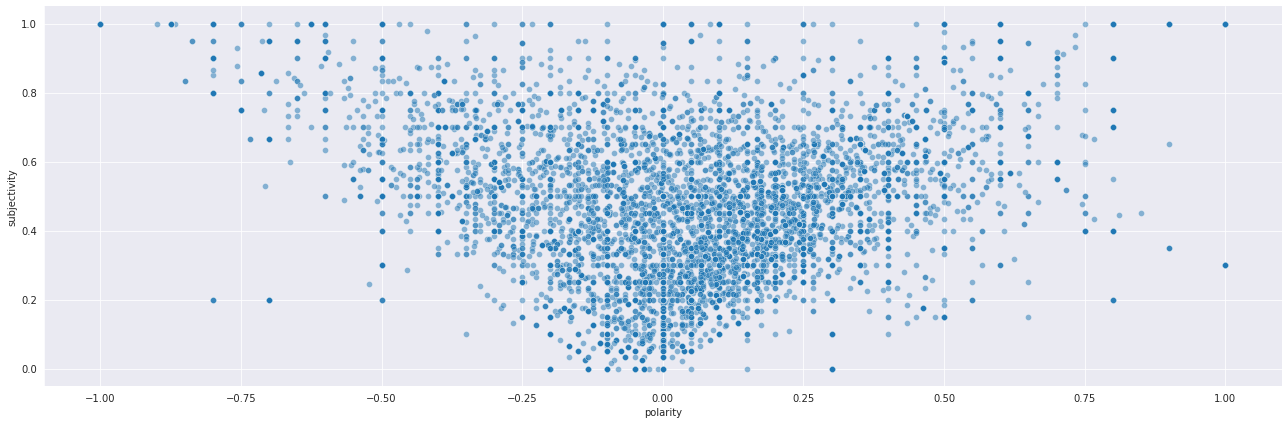

In [22]:
sns.set_style(style= 'darkgrid')
sns.relplot(x='polarity', y='subjectivity',
            sizes=(40, 400), alpha=.5, palette="mako",
            height=6, aspect = 3,data=Israel)

In [23]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(review for review in Israel.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2039851 words in the combination of all review.


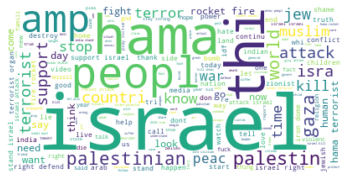

In [24]:
wordcl = WordCloud(background_color="white").generate(text)
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
Israel.tail()

,date,tweet,polarity,subjectivity,Analysis
43525,05-09-2021,not side pro palestinian terror incit call isr...,0.000000,0.000000,0
43526,05-09-2021,all indian support our brotherhood israel isra...,-0.166667,0.533333,-1
43527,05-08-2021,these goyim realiti villag loft hazak isf,0.000000,0.000000,0
43528,05-06-2021,when end our kid murder simpli jew and happen ...,0.100000,0.200000,1
43529,05-10-2021,ilhan omar support terror rt agre,0.000000,0.000000,0


# **7. Word Embedding (Bag of Words)**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer( min_df=2,max_features=100000)
bow.fit(Israel['tweet'])
Israel_processed = bow.transform(Israel['tweet']).toarray()

# **8. Splitting of Datasets**

In [27]:
y = Israel.drop(labels= ['polarity', 'subjectivity','date','tweet'], axis=1)
X = Israel.drop(labels= ['Analysis','date','tweet'],axis=1)

In [28]:
y

,Analysis
0,0
1,0
2,0
3,0
4,1
...,...
43525,0
43526,-1
43527,0
43528,1


In [29]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_test

,polarity,subjectivity
14494,-0.287500,0.358333
41712,0.357143,0.571429
20579,0.200000,0.427778
2754,-0.375000,0.625000
19473,-0.100000,0.100000
...,...,...
36941,0.000000,0.000000
37918,0.000000,0.000000
42906,-0.107143,0.717857
5137,0.000000,0.000000


In [30]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6577 entries, 14494 to 7144
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Analysis  6577 non-null   object
dtypes: object(1)
memory usage: 102.8+ KB


# **9. Model Prediction**

In [31]:
from sklearn.svm import SVC
SV = SVC(C=1.0, kernel='sigmoid', degree=7, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
SV.fit(X_train, y_train.values.ravel())

SVC(degree=7, kernel='sigmoid')

In [32]:
y_pred = SV.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 609  146  334]
 [  61 3568   32]
 [ 219  188 1420]]
              precision    recall  f1-score   support

          -1       0.69      0.56      0.62      1089
           0       0.91      0.97      0.94      3661
           1       0.80      0.78      0.79      1827

    accuracy                           0.85      6577
   macro avg       0.80      0.77      0.78      6577
weighted avg       0.84      0.85      0.85      6577

0.8509958947848563


# **10. Visualization**

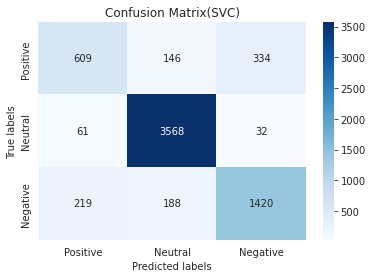

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix(SVC)');
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative']);